## Final Project Submission

Please fill out:
* Student name: Dhruv Ragunathan
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Mark Barbour
* Blog post URL:


# Introduction and Business Case

The purpose of this notebook is too analyze the housing data in King's County to provide BlackPebble(any similarity to real world companies are coincidential) information on purchasing property in that region.

The analysis in this notebook consists of analyzing KC Housing Data and creating a model to help predict sale price based on certain variables.

Managing Directors at Blackmineral will use these models to determine their strategy for purchasing property in King's County.

In [2]:
import pandas as pd
import numpy as np

In [3]:
kc_house_df = pd.read_csv('data/kc_house_data.csv')

kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# Data Understanding

* Data description: The csv contains house sales data in King's county. This data contains records of houses sold in King's county with variables such as the price, bedrooms, bathrooms, view etc.

* Data use: This dataset can be used to create models that help predict prices of houses in King County.

* Size of Data: The dataset has 21597 records and 21 columns.

* Analysis method: Multi-linear regression will be used to create models that show the impact of variables on price.

* Data Limitations: This data set is limited by the amount of variables recorded during the house sale. There are other key points to consider when evaluating a potential sale price such as quality of the school districts, noise in the area, etc.

# Data Preparation

First review the data and find and clean missing values

In [4]:
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
# Determine where there are missing values

kc_house_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
#Determine percentage of records missing in each category

num_records = len(kc_house_df)

prc_wf_msg = round(kc_house_df.isna().sum()['waterfront']/num_records * 100,1)

prc_yr_ren_msg = round(kc_house_df.isna().sum()['yr_renovated']/num_records*100,1)

prc_view_msg = round(kc_house_df.isna().sum()['view']/num_records*100,1)


print("The percent of records missing for waterfront are ",prc_wf_msg)

print("The percent of records missing for view are ",prc_view_msg)

print("The percent of records missing for renovated year are ",prc_yr_ren_msg)


The percent of records missing for waterfront are  11.0
The percent of records missing for view are  0.3
The percent of records missing for renovated year are  17.8


The number of records missing a view are neglible (0.3%), so all those rows can be dropped.

In [7]:
# Drop all rows missing the view

kc_house_df = kc_house_df.loc[kc_house_df['view'].dropna().index]

kc_house_df.isna().sum() # all Records where view is NA are dropped

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2370
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3830
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
# The column renovated year will be dropped in the data frame since nearly 20% of the data is missing

kc_house_df = kc_house_df.drop(columns = 'yr_renovated')

kc_house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,8 Good,1600,0.0,2004,98027,47.5345,-122.069,1410,1287


In [9]:
# Get breakdown of yes versus no

kc_house_df["waterfront"].value_counts()

NO     19019
YES      145
Name: waterfront, dtype: int64

Finally for Waterfront, we cannot drop columns with missing data since that's 10% of the overall dataset.

I would be interested to see the impact of a house being near a waterfront on the price.

Since most of the filled data is overwhelmingly "NO", I will fill the missing values with No since this won't impact the dataset significantly.

In [10]:
# Fill missing data for waterfront with NO

kc_house_df = kc_house_df.fillna(value= "NO")

kc_house_df["waterfront"].value_counts() # Confirm number of "NO" has increased

NO     21389
YES      145
Name: waterfront, dtype: int64

Note that the proportion of NO has increased from 99.2% to 99.3%. This would have a neglible effect on the model.

In [11]:
# Based on the info of the dataframe, the following columns are numeric or categorical
# Numeric: date, rice, bedrooms, bathrooms, sqft_living, sqft_lot, floors, sqft_above, yr_built, lat, long, sqft_living15, sqft_lot15
# Numeric Category: zipcode
# String Category: waterfront, view, condition, grade

kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  int64  
 1   date           21534 non-null  object 
 2   price          21534 non-null  float64
 3   bedrooms       21534 non-null  int64  
 4   bathrooms      21534 non-null  float64
 5   sqft_living    21534 non-null  int64  
 6   sqft_lot       21534 non-null  int64  
 7   floors         21534 non-null  float64
 8   waterfront     21534 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21534 non-null  object 
 11  grade          21534 non-null  object 
 12  sqft_above     21534 non-null  int64  
 13  sqft_basement  21534 non-null  object 
 14  yr_built       21534 non-null  int64  
 15  zipcode        21534 non-null  int64  
 16  lat            21534 non-null  float64
 17  long           21534 non-null  float64
 18  sqft_l

In [12]:
# Confirm that categorical/string variables are formatted correctly in dataset

kc_house_df["view"].value_counts()

kc_house_df["condition"].value_counts()

kc_house_df["grade"].value_counts()

kc_house_df["sqft_basement"].value_counts()




0.0       12798
?           452
600.0       216
500.0       209
700.0       207
          ...  
1840.0        1
1481.0        1
2240.0        1
2810.0        1
2250.0        1
Name: sqft_basement, Length: 302, dtype: int64

### Data Cleaning Numeric Categories

The sqft_basement column is an object in the dataframe even though it should be numeric. This is because values in that field are "?" a string. The strategy to clean this would be to replace them with the average basement square footage. 452 records are not significant, but would prefer not to drop the data.

In [13]:
# Calculate the mean sqft_basement. Replace "?" with the mean

sqft_basement_num = kc_house_df[kc_house_df["sqft_basement"] != "?"]["sqft_basement"]

sqft_basement_num = sqft_basement_num.astype('float64')

avg_sqft_basement = round(sqft_basement_num.mean(),1) # data is rounded to one-decimal place in dataframe
 
avg_sqft_basement

291.4

In [14]:
# Replace the ? to the avg square basement size

kc_house_df["sqft_basement"].replace(to_replace="?",value = avg_sqft_basement,inplace = True)

In [15]:
# Convert datatype from object to float now

kc_house_df["sqft_basement"] = kc_house_df["sqft_basement"].astype('float64')

kc_house_df.info() # 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  int64  
 1   date           21534 non-null  object 
 2   price          21534 non-null  float64
 3   bedrooms       21534 non-null  int64  
 4   bathrooms      21534 non-null  float64
 5   sqft_living    21534 non-null  int64  
 6   sqft_lot       21534 non-null  int64  
 7   floors         21534 non-null  float64
 8   waterfront     21534 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21534 non-null  object 
 11  grade          21534 non-null  object 
 12  sqft_above     21534 non-null  int64  
 13  sqft_basement  21534 non-null  float64
 14  yr_built       21534 non-null  int64  
 15  zipcode        21534 non-null  int64  
 16  lat            21534 non-null  float64
 17  long           21534 non-null  float64
 18  sqft_l

In [16]:
kc_house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.153400e+04,2.153400e+04,21534.000000,21534.000000,21534.000000,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,4.582351e+09,5.400577e+05,3.373038,2.115712,2079.827854,1.509060e+04,1.494126,1788.557537,291.360815,1971.002275,98077.939352,47.560180,-122.213948,1986.299944,12751.079502
std,2.876779e+09,3.660596e+05,0.926410,0.768602,917.446520,4.138021e+04,0.539806,827.745641,437.344152,29.376044,53.506639,0.138528,0.140735,685.121001,27255.483308
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123212e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,0.000000,1951.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904945e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,1560.000000,0.000000,1975.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000
75%,7.312175e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068775e+04,2.000000,2210.000000,550.000000,1997.000000,98118.000000,47.678100,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [17]:
# The model will first use the total square footage of the property and model it with the price
# This is sqft_above plus the sqft_basement

kc_house_df["sqft_total"] = kc_house_df["sqft_above"] + kc_house_df["sqft_basement"]

kc_house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_total
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,1180.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,2570.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062,770.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,1960.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,1680.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,98103,47.6993,-122.346,1530,1509,1530.0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,98146,47.5107,-122.362,1830,7200,2310.0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,98144,47.5944,-122.299,1020,2007,1020.0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NO,NONE,...,8 Good,1600,0.0,2004,98027,47.5345,-122.069,1410,1287,1600.0


# Modeling

First let's create a baseline model. We will start with the variable square feet total (sqft_total) which is the total square footage of the property

In [18]:
import matplotlib.pyplot as plt
from matplotlib import style
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm 

In [19]:
X = kc_house_df[["bedrooms","bathrooms","sqft_living","sqft_lot","floors",]]

In [20]:
num_col_array = []

num_columns = kc_house_df.select_dtypes(include=np.number).columns[1:]

for col in num_columns[1:]:
    num_col_array.append(col)

num_col_array

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'sqft_total']

In [21]:
X_test = kc_house_df[num_col_array]
Y_test = kc_house_df['price']

In [22]:
test_model = sm.OLS(endog=Y_test, exog=sm.add_constant(X_test))
test_results = test_model.fit()
print(test_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     2786.
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        16:16:08   Log-Likelihood:            -2.9579e+05
No. Observations:               21534   AIC:                         5.916e+05
Df Residuals:                   21520   BIC:                         5.917e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -1.12e+07   3.19e+06     -3.511

In [23]:
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  int64  
 1   date           21534 non-null  object 
 2   price          21534 non-null  float64
 3   bedrooms       21534 non-null  int64  
 4   bathrooms      21534 non-null  float64
 5   sqft_living    21534 non-null  int64  
 6   sqft_lot       21534 non-null  int64  
 7   floors         21534 non-null  float64
 8   waterfront     21534 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21534 non-null  object 
 11  grade          21534 non-null  object 
 12  sqft_above     21534 non-null  int64  
 13  sqft_basement  21534 non-null  float64
 14  yr_built       21534 non-null  int64  
 15  zipcode        21534 non-null  int64  
 16  lat            21534 non-null  float64
 17  long           21534 non-null  float64
 18  sqft_l

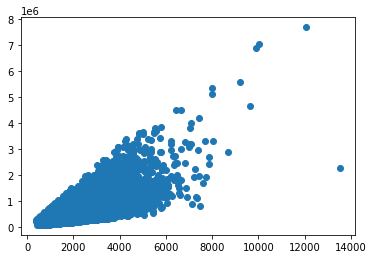

In [24]:
# First determine if there is a linear relationship between squarefeet total and price

X = kc_house_df["sqft_total"]

Y = kc_house_df["price"]

plt.scatter(X, Y);


In [25]:
# First create a baseline model

baseline_model = sm.OLS(endog=Y, exog=sm.add_constant(X))
baseline_model

In [26]:
baseline_results = baseline_model.fit()
baseline_results

In [27]:
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                 2.076e+04
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        16:16:08   Log-Likelihood:            -2.9915e+05
No. Observations:               21534   AIC:                         5.983e+05
Df Residuals:                   21532   BIC:                         5.983e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.259e+04   4418.546     -9.639      0.0

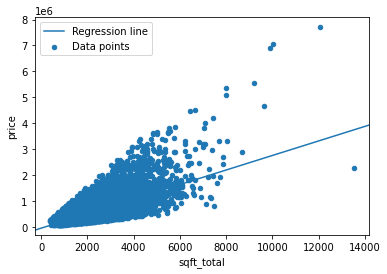

In [28]:
fig, ax = plt.subplots()
kc_house_df.plot.scatter(x="sqft_total", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax)
ax.legend();

In [29]:
"""
The current model has an R^2 value of 0.49. This implies that the data is moderately correlated. 
There is significant deviation between the model and prediction.

"""



'\nThe current model has an R^2 value of 0.49. This implies that the data is moderately correlated. \nThere is significant deviation between the model and prediction.\n\n'

### Next Model Iteration

Now let's add another variable to the model. Let's add the zipcode. From common knowledge, Zip code plays a significant role in property value.

While zip code is a numeric value, it should be treated like a numeric categorical value instead of a continuous function.

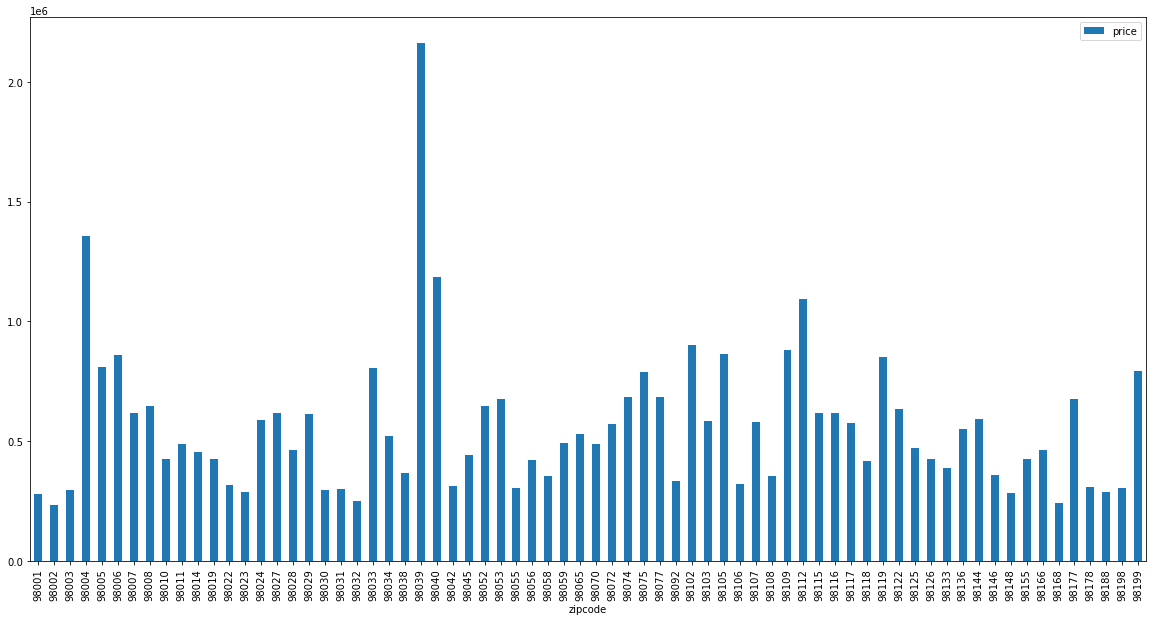

In [30]:
# Visualizing the difference in sale price between different zip codes

fig, ax = plt.subplots(figsize=(20,10))
kc_house_df.groupby("zipcode").mean().plot.bar(y="price", ax=ax);

In [31]:
# Zipcode is a categorical variable, need to determine a reference zip code
# Will pick a zipcode that's closest to the average price


avg_price = kc_house_df["price"].mean()

avg_price

540057.663833937

In [32]:
kc_house_df.groupby("zipcode").mean()["price"]

zipcode
98001    2.808812e+05
98002    2.342840e+05
98003    2.941113e+05
98004    1.358522e+06
98005    8.102897e+05
             ...     
98177    6.765234e+05
98178    3.106128e+05
98188    2.890783e+05
98198    3.032987e+05
98199    7.926315e+05
Name: price, Length: 70, dtype: float64

In [33]:
# Find the zip code that's closest to the average price. This is the zip code that will be used as the reference point.

zip_mean_price = kc_house_df.groupby("zipcode").mean()["price"]

kc_house_df.iloc[(zip_mean_price-avg_price).abs().argsort()[:1]] # zipcode 98115 is the reference point

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_total
35,9547205180,6/13/2014,696000.0,3,2.5,2300,3060,1.5,NO,NONE,...,8 Good,1510,790.0,1930,98115,47.6827,-122.31,1590,3264,2300.0


In [34]:
# Define variables for second iteration

X_iteration = kc_house_df[["sqft_total", "zipcode"]]

X_iteration = pd.get_dummies(X_iteration, columns=["zipcode"],prefix = '',prefix_sep = '')

X_iteration


,sqft_total,98001,98002,98003,98004,98005,98006,98007,98008,98010,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,1180.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2570.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,770.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1960.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1680.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21593,2310.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
21594,1020.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21595,1600.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# Drop zipcode 98115

X_iteration = X_iteration.drop(axis=1,columns='98115')

X_iteration

,sqft_total,98001,98002,98003,98004,98005,98006,98007,98008,98010,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,1180.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2570.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,770.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1960.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1680.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21593,2310.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
21594,1020.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21595,1600.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
second_model = sm.OLS(Y, sm.add_constant(X_iteration))
second_results = second_model.fit()

print(second_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     829.6
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        16:16:11   Log-Likelihood:            -2.9231e+05
No. Observations:               21534   AIC:                         5.848e+05
Df Residuals:                   21463   BIC:                         5.853e+05
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.586e+05   8418.273     18.841      0.0

### Second Iteration

With the addition of zipcode, the model's performance improves to an adjusted r-squared of 0.73.

Adding zipcode has improved the model.

### Next Model Iteration

The next variable we will add is the view. The view typically affects the price of a house.


In [37]:
# Review the different values

kc_house_df["view"].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [38]:
# First repeat the steps in the second iteration to include zip codes

X_iteration_3 = kc_house_df[["sqft_total", "zipcode","view"]]

X_iteration_3 = pd.get_dummies(X_iteration_3, columns=["zipcode"],prefix = '',prefix_sep = '')

X_iteration_3 = X_iteration_3.drop(axis=1,columns='98115')

In [39]:
# Now apply the OHE to the view.

X_iteration_3 = pd.get_dummies(X_iteration_3, columns=["view"])

X_iteration_3 = X_iteration_3.drop(axis=1,columns='view_AVERAGE') # Drop the average column

third_model = sm.OLS(Y, sm.add_constant(X_iteration_3))
third_results = third_model.fit()

print(third_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     985.1
Date:                Mon, 29 May 2023   Prob (F-statistic):               0.00
Time:                        16:16:11   Log-Likelihood:            -2.9047e+05
No. Observations:               21534   AIC:                         5.811e+05
Df Residuals:                   21459   BIC:                         5.817e+05
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.844e+05   9910.331     28.

The models performance has improved since the R^squared value has increased from 0.73 to 0.77 with the addition of view to the model.

# Regression Results

## Analysis of Regression Results

The model has an R-squared value of 0.77 meaning that 77% of the sales data can be explained by the variables total square footage, zipcode, and view.



### Mean Absolute Error

***Mean absolute error (MAE)*** calculates the **absolute value** of each error before adding it to the sum.

In [40]:
mae = third_results.resid.abs().sum()/len(Y)

mae

104110.53569547841

The mean absolute error is $104,110.

Meaning that our model is off by about $100,000 in a given prediction

### Root Mean Squared Error

calculates the **squared** value of each error, sums them, then takes the **square root** at the end.

In [41]:
rmse = ((third_results.resid ** 2).sum() / len(Y)) ** 0.5
rmse

174566.84873126325

The root mean square error is $175,000

Meaning that our model is off by about $175,000 in a given prediction per this parameter.

### y-intercept interpretation

The y-intercept of the model is 284,400. This means that for a house that has 0 square feet, a zip-code of 98115, and an average view, the price is 284,000.

### Total Square footage coefficient

The total square-foot is the combined above square-footage with the basement.

The coefficient is of square footage is $226.06. 

This means that each additional square-foot increases the house price by $226.06.


### Zipcode coefficient

The graph below shows the effect of a zip code on the house price. For example, houses in the zip code 98001 tend to be 347,197 less. Houses in zip code 98102 are on average 200,000 more expensive.

This tracks well since zip-code 98102 corresponds to capitol hill which is near the hub of Seattle. Zip code 98001 is Auburn washington which is a less expensive neighborhood.


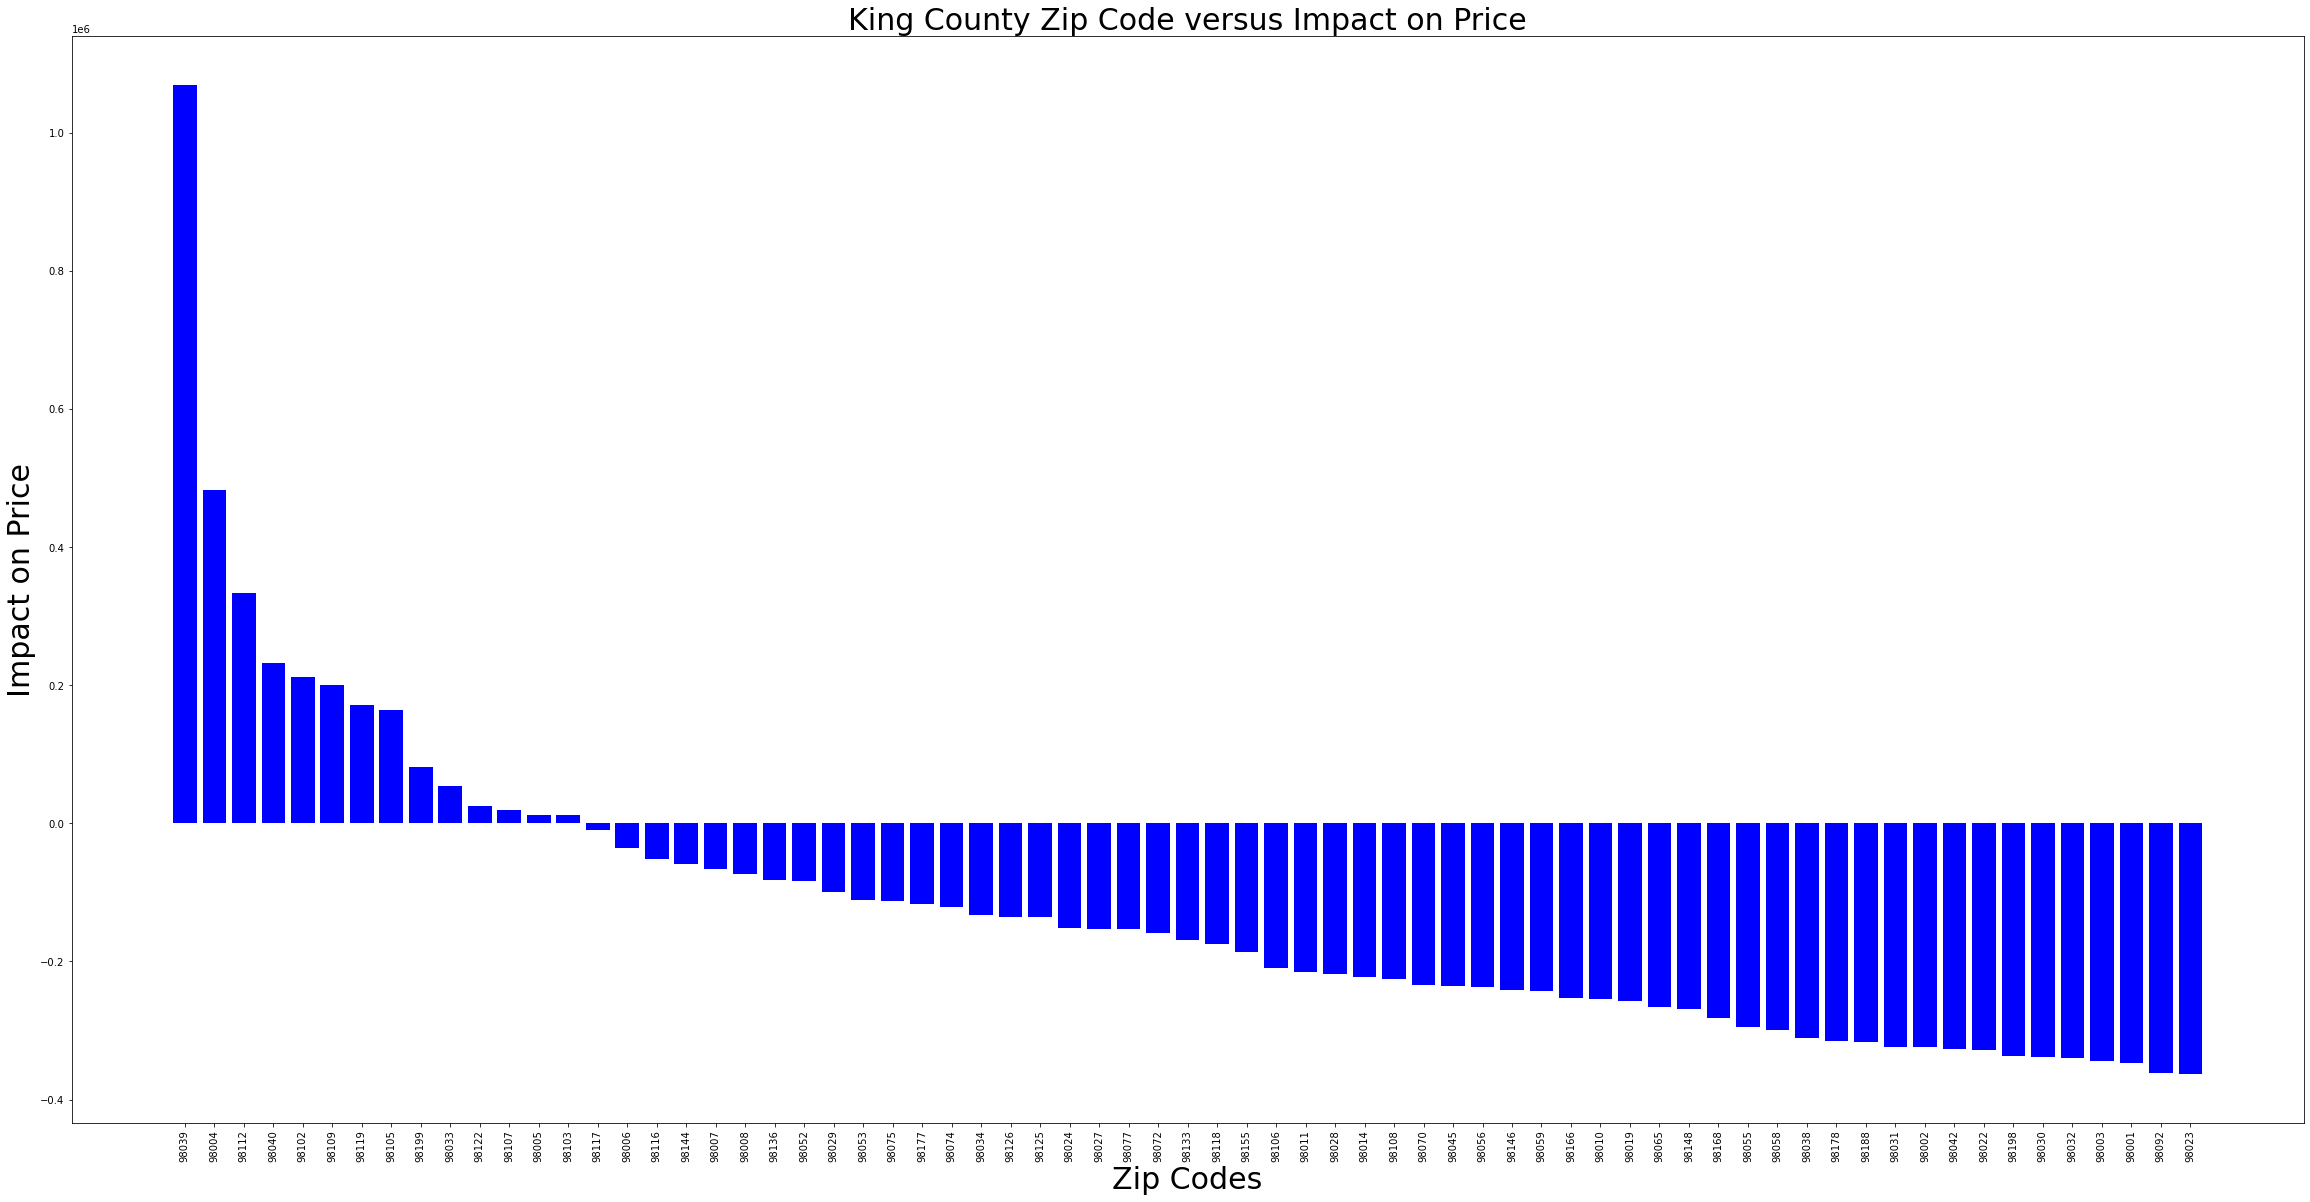

In [42]:
# Plot Zip codes and coefficients

x = third_results.params[2:71].sort_values(ascending = False).index
y = third_results.params[2:71].sort_values(ascending = False)

fig = plt.figure(figsize = (40, 20))

plt.bar(x,y, color = 'blue', width = 0.8)

plt.xlabel("Zip Codes",fontsize=30)
plt.ylabel("Impact on Price",fontsize=30)
plt.xticks(rotation=90)
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=20) 
plt.title("King County Zip Code versus Impact on Price",fontsize=30)
plt.show()

### View Coefficient

The view coefficient's show how much the view impacts the price. An excellent view increases the price by around 500,000. A Fair view reduces it by around 9700.


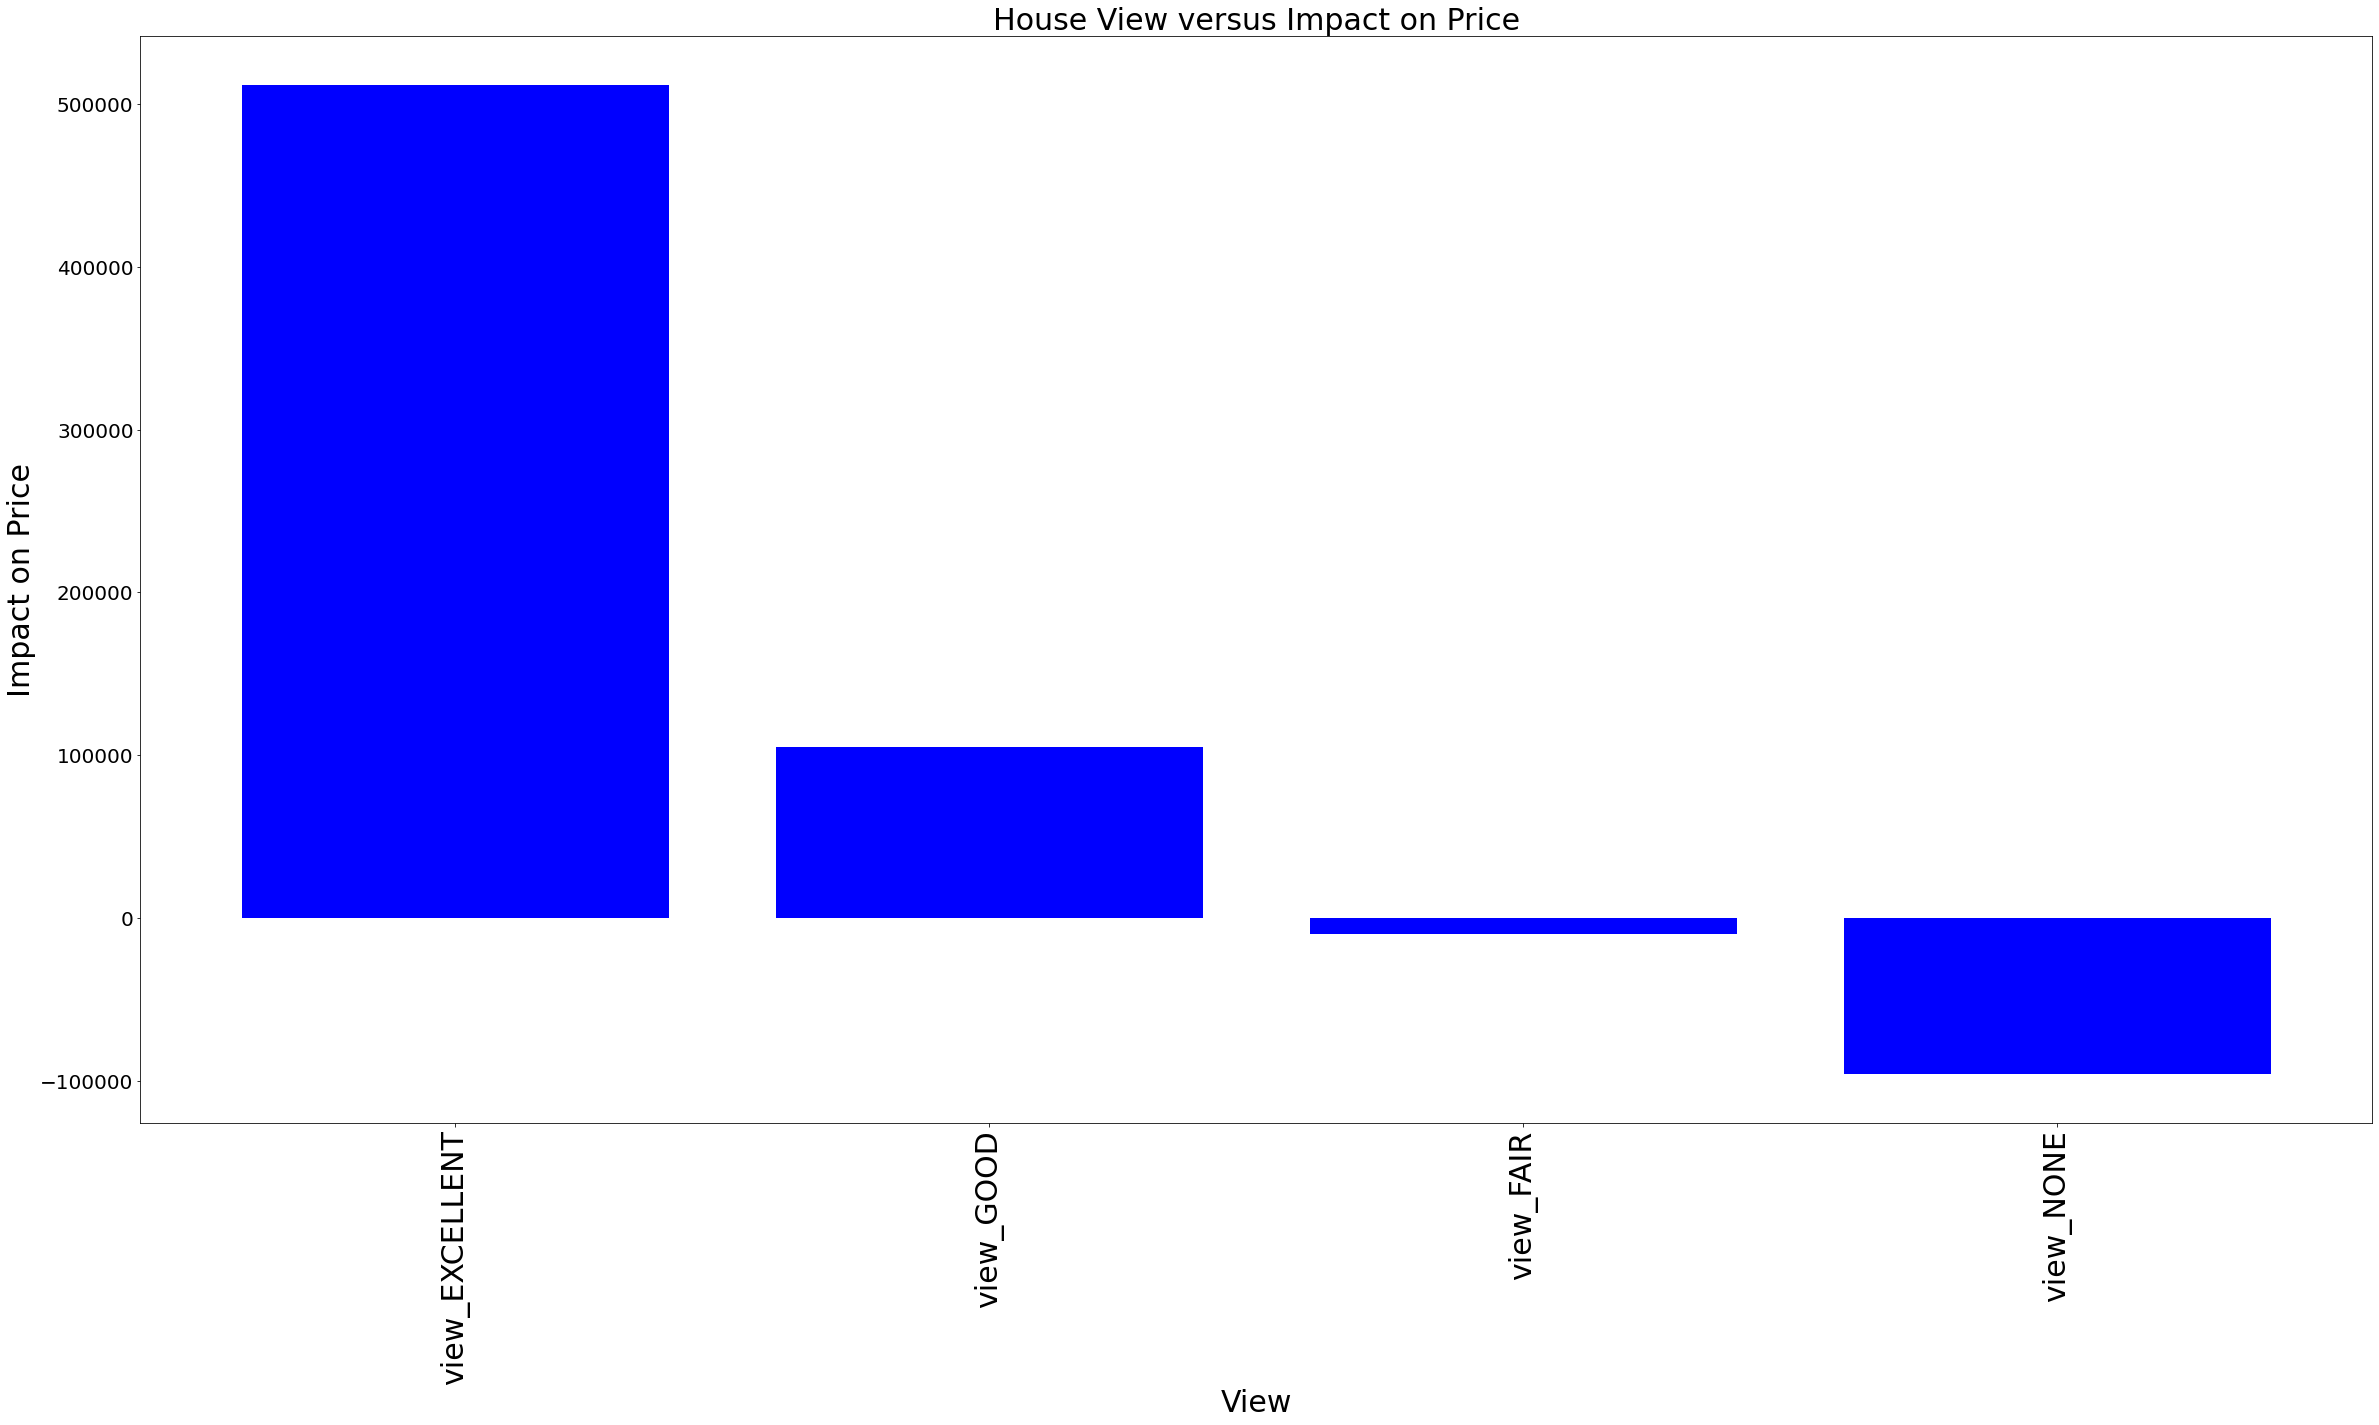

In [43]:
x = third_results.params[71:].sort_values(ascending = False).index
y = third_results.params[71:].sort_values(ascending = False)

fig = plt.figure(figsize = (40, 20))

plt.bar(x,y, color = 'blue', width = 0.8)

plt.xlabel("View",fontsize=30)
plt.ylabel("Impact on Price",fontsize=30)
plt.xticks(rotation=90)
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=20) 
plt.title("House View versus Impact on Price",fontsize=30)
plt.show()

# Conclusion and Recommendations


* Invest in properties in the following zip codes: 98039, 98004, 98112, 98040, 98012, 98019, 98119, 98105, 98199, 98033, 98122, 98107.
* Invest in properties with excellent or good views.
* Maximize the square footage.

In [44]:
# zip code and square footage may not be completely independent. The price per square footage may vary based on the zip code.
# Similarly, zip-code and view may not be completely independent. Certain zip-codes may be more likely to have a certain view (i.e. districts near mount rainer)